In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
liste_pokemon = pd.read_csv("csv/pokemon.csv")
liste_pokemon.columns =liste_pokemon.columns.str.strip().str.lower().str.replace(' ', '_')

pv = liste_pokemon.loc[:,"points_de_vie"]
att = liste_pokemon.loc[:,"attaque"]

type_pkmn = liste_pokemon.loc[:,"type"]
cible =[50,69]
k=5

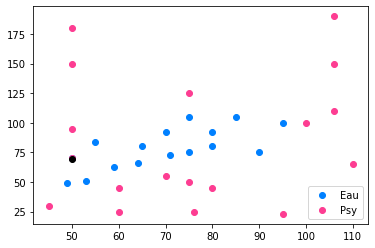

In [3]:
plt.scatter(pv.loc[type_pkmn =="Eau"], att.loc[type_pkmn =="Eau"], color='#0080ff', label='Eau')
plt.scatter(pv.loc[type_pkmn =="Psy"], att.loc[type_pkmn =="Psy"], color='#fd3d92', label='Psy')
plt.scatter(cible[0], cible[1], color='k')
plt.legend()
plt.show()

In [4]:
d=list(zip(pv,att))
model = KNeighborsClassifier(n_neighbors=k)
model.fit(d,type_pkmn)
prediction= model.predict([cible])

In [5]:
txt="Résultat : "
if prediction[0] == 'Eau':
    txt=txt+"Eau"
if prediction[0] == "Psy":
    txt=txt+"Psy"

print(txt)

Résultat : Eau


In [6]:
""" with open("liste_cible.csv",'a') as liste_cible :
    liste_cible.write("points_de_vie,attaque\n".format(pv,att)) 
    for pv in range(20,110):
        for att in range(35,150):
            liste_cible.write("{0},{1}\n".format(pv,att))   """ 

' with open("liste_cible.csv",\'a\') as liste_cible :\n    liste_cible.write("points_de_vie,attaque\n".format(pv,att)) \n    for pv in range(20,110):\n        for att in range(35,150):\n            liste_cible.write("{0},{1}\n".format(pv,att))   '

In [7]:
liste_cible = pd.read_csv("liste_cible.csv")

model = KNeighborsClassifier(n_neighbors=k)
model.fit(d,type_pkmn)

for index in range(len(liste_cible.index)-1):
    prediction= model.predict([[ liste_cible.loc[index][0],liste_cible.loc[index][1]]])
    if prediction[0] == 'Eau':
        plt.scatter(liste_cible.loc[index][0], liste_cible.loc[index][1], color='#0080ff')
    if prediction[0] == "Psy":
        plt.scatter(liste_cible.loc[index][0], liste_cible.loc[index][1], color='#fd3d92')



FileNotFoundError: [Errno 2] No such file or directory: 'liste_cible.csv'